In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import savgol_filter
import mdtraj
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *

- residues of interest
    - F413 PHE, 365 in PyMol
    - Q414 GLN, 366 in PyMol

In [2]:
def getResAtoms(topo, seq):
    """
    get the residue and its atom indices for a given residue number
    """
    atoms = topo.select("protein and resSeq %d" % seq)
    res = topo.atom(atoms[0]).residue
    return res, atoms

def resDist(traj, topo, seq1, seq2):
    """
    distance between two residues
    """
    res1, atoms1 = getResAtoms(topo, seq1)
    res2, atoms2 = getResAtoms(topo, seq2)
    center1 = np.mean(traj.xyz[:, atoms1, :], axis=1)
    canter2 = np.mean(traj.xyz[:, atoms2, :], axis=1)
    dist = center1 - canter2
    dist = (dist[:,0]**2 + dist[:,1]**2 + dist[:,2]**2)**0.5
    return res1, res2, dist

data = []
for n in range(3):
    topoFile = r'D:\MD\ASAP-sim\ASAP3b\A-GFP\system_dabbled.psf'
    trajFile = r'D:\MD\ASAP-sim\ASAP3b\A-GFP\run_%d.nc' % (n+1)
    traj = mdtraj.load(trajFile, top=topoFile)
    topo = traj.topology
    # pymol: select chain X and (resi 85 or resi 365) 
    res1, res2, dist = resDist(traj, topo, 85, 365)
    if n==0: print(res1, res2)
    # dist2 = savgol_filter(dist, 11, 2)
    v = np.gradient(dist)
    a = np.gradient(v)
    data.append([dist, v, a])

VAL85 PHE365


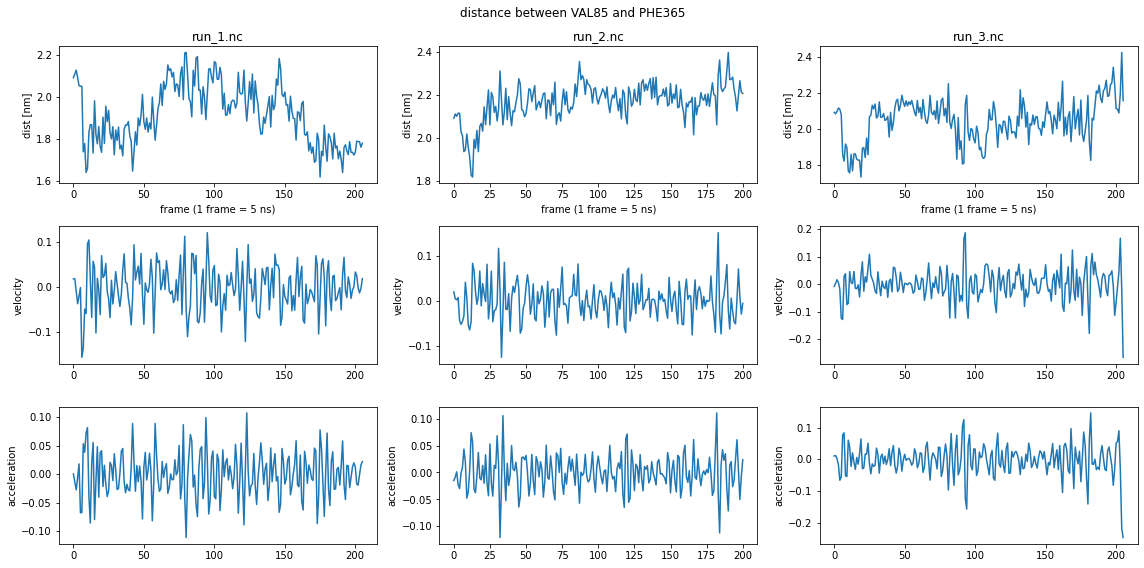

In [7]:
def plot(data):
    fig, axs = plt.subplots(3, 3, figsize=(16,8))
    for n in range(len(data)):
        dist, v, a = data[n]
        axs[0, n].set_title('run_%d.nc' % (n+1))
        axs[0, n].set_xlabel('frame (1 frame = 5 ns)')
        axs[0, n].set_ylabel('dist [nm]') 
        axs[0, n].plot(dist)
        axs[1, n].set_ylabel('velocity')
        axs[1, n].plot(v)
        axs[2, n].set_ylabel('acceleration')
        axs[2, n].plot(a)
    fig.suptitle('distance between %s and %s' % (res1, res2))
    plt.tight_layout(); plt.show()
    
plot(data)